$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
# Qiskit Basics

The following describes the basic functionality of Qiskit and how to:

(1) Initialize qubits and classical registers

(2) Perform operations

(3) Make measurements

In addition we cover different simulation backends and plotting.  Lots of this is also in the IBM Qiskit Terra tutorial.

### Import necessary packages

In [3]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, execute, BasicAer
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

import numpy as np

### Initialize quanutm and classical registers

In [4]:
# quantum circuit with 2 qubits initliased in the |0> state
q = QuantumRegister(2)

# classical register for readout with 2 bits of representation
c = ClassicalRegister(2)


### Build the quantum circuit

In [10]:
# build the circuit
qc = QuantumCircuit(q,c)

# apply Y to qubit 0
qc.y(q[0])

# apply Z to qubit 1
qc.z(q[1])

# apply Hadamard to qubit 0
qc.h(q[0])

# apply Hadamard to qubit 1
qc.h(q[1])

qc.barrier(q)

# measure the qubits
qc.measure(q, c)

### Visualisation

To check we applied the correct operations we can draw it!

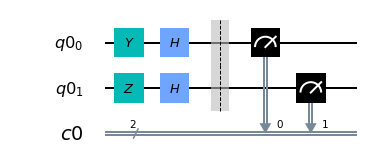

In [11]:
qc.draw(output = 'mpl')

### Backend

Once we have the circuit we need to choose our computing options ("backend").  This will determine how we run the circuit.  You can either do this numerically (so you output the state vector or unitary exactly), simulate a quantum computer (so you output fake, noisey, data) or run it on a real quanutm computer.  For our purpose we will moslty be generating fake data, but lets check out the other two:

In [12]:
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator') from BasicAer()>,
 <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>,
 <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]

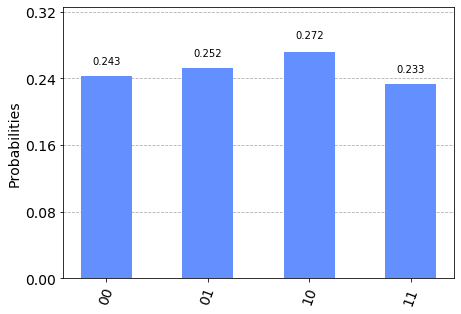

In [22]:
# load the QASM backend
backend = BasicAer.get_backend('qasm_simulator')

# select the number of shots (repeats) of the experiment, and run the job
job = execute(qc, backend, shots=1000)
result = job.result()

# get the counts (how many events in each bin)
counts = result.get_counts(qc)

# plot
plot_histogram(counts)

Congrats! This your first quanutm data!